In [1]:
%load_ext dotenv
%dotenv

In [2]:
name_to_id = {
    'realDonaldTrump': '25073877',   
    'vp': '818910970567344128',
    'whitehouse': '822215673812119553',
    'potus': '822215679726100480'
}

In [3]:
import base64
import os
#Define your keys from the developer portal
client_key = os.environ.get('TWITTER_KEY')
client_secret = os.environ.get('TWITTER_SECRET')
#Reformat the keys and encode them
key_secret = '{}:{}'.format(client_key, client_secret).encode('ascii')

# Transform from bytes to bytes that can be printed
b64_encoded_key = base64.b64encode(key_secret)
#Transform from bytes back into Unicode
b64_encoded_key = b64_encoded_key.decode('ascii')

In [25]:
base_url = 'https://api.twitter.com/'

In [26]:
import requests
auth_url = '{}oauth2/token'.format(base_url)
auth_headers = {
    'Authorization': 'Basic {}'.format(b64_encoded_key),
    'Content-Type': 'application/x-www-form-urlencoded;charset=UTF-8'
}
auth_data = {
    'grant_type': 'client_credentials'
}
auth_resp = requests.post(auth_url, headers=auth_headers, data=auth_data)

In [5]:
print(auth_resp)

<Response [200]>


In [27]:
access_token = auth_resp.json()['access_token']

In [28]:
search_headers = {
    'Authorization': 'Bearer {}'.format(access_token)    
}
search_params = {
    'q': 'NASA',
    'result_type': 'recent',
    'count': 2
}
search_url = '{}1.1/search/tweets.json'.format(base_url)
search_resp = requests.get(search_url, headers=search_headers, params=search_params)

In [29]:
import json 
search_headers = {
    'Authorization': 'Bearer {}'.format(access_token)    
}
search_params = {
    'q': 'NASA',
    'result_type': 'recent',
    'count': 10
}
# Create the URL
search_url = '{}1.1/search/tweets.json'.format(base_url)
# Execute the get request
search_resp = requests.get(search_url, headers=search_headers, params=search_params)
# Get the data from the request
Data = json.loads( search_resp.content )
# Print out the data!
# print(Data['statuses'])

In [30]:
url = 'https://api.twitter.com/1.1/application/rate_limit_status.json'
#Execute the request
search_resp = requests.get(url, headers=search_headers)
#See the remaining rate limit
json.loads(search_resp.content)['resources']['search']

{'/search/tweets': {'limit': 450, 'remaining': 448, 'reset': 1567382267}}

In [47]:
json.loads(search_resp.content)[-1]['id']

1164169890917433346

In [19]:
https://api.twitter.com/1.1/statuses/user_timeline.json?screen_name=twitterapi&count=2

'https://api.twitter.com/1.1/application/rate_limit_status.json'

In [33]:
search_url = '1.1/statuses/user_timeline.json'
url = base_url + search_url

search_headers = {
    'Authorization': 'Bearer {}'.format(access_token)    
}
search_params = {
    'user_id': '25073877',
    'count': 200
}

search_resp = requests.get(url, headers=search_headers, params=search_params)

In [40]:
url

'https://api.twitter.com/1.1/statuses/user_timeline.json'

In [34]:
test = json.loads( search_resp.content )

In [35]:
len(test)

200

In [39]:
test[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])


In [117]:
def get_all_tweets(user_id):
    url = 'https://api.twitter.com/1.1/statuses/user_timeline.json'
    
    search_headers = {
    'Authorization': 'Bearer {}'.format(access_token)    
}
    search_params = {
    'user_id': user_id,
    'count': 200,
    'tweet_mode': 'extended' # added to eliminate 140 char limit. If it is a retweet, the full text is
                            # found under the retweet_status
}
    
    all_tweets = []
    
    new_tweets = json.loads(requests.get(url, headers=search_headers, params=search_params).content)
    all_tweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = all_tweets[-1]['id'] - 1
    
    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        search_params['max_id'] = oldest
        print(f"getting tweets before {oldest}")
        
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = json.loads(requests.get(url, headers=search_headers, params=search_params).content)
        
        #save most recent tweets
        all_tweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = all_tweets[-1]['id'] - 1
        
        print(f"{len(all_tweets)} tweets downloaded so far")
    return all_tweets

In [48]:
trump_tweets = get_all_tweets(name_to_id['realDonaldTrump'])

getting tweets before 1165693064465326079
400 tweets downloaded so far
getting tweets before 1162848110118354943
599 tweets downloaded so far
getting tweets before 1159473911748317188
798 tweets downloaded so far
getting tweets before 1155235323938508799
998 tweets downloaded so far
getting tweets before 1151576111186399231
1198 tweets downloaded so far
getting tweets before 1148953550938152959
1398 tweets downloaded so far
getting tweets before 1144029093358235647
1598 tweets downloaded so far
getting tweets before 1139646919150620673
1798 tweets downloaded so far
getting tweets before 1135150118120939520
1998 tweets downloaded so far
getting tweets before 1130994855042273279
2198 tweets downloaded so far
getting tweets before 1127185907340255233
2396 tweets downloaded so far
getting tweets before 1124116620979445760
2593 tweets downloaded so far
getting tweets before 1120473592637153279
2793 tweets downloaded so far
getting tweets before 1115593488656211967
2993 tweets downloaded so 

In [62]:
import pandas as pd

In [49]:
import json
with open('trump_data.json', 'w', encoding='utf-8') as f:
    json.dump(trump_tweets, f, ensure_ascii=False)

In [67]:
df = pd.read_json('data.json')

In [70]:
df.dtypes

contributors                        float64
coordinates                         float64
created_at                   datetime64[ns]
entities                             object
extended_entities                    object
favorite_count                        int64
favorited                              bool
geo                                 float64
id                                    int64
id_str                                int64
in_reply_to_screen_name              object
in_reply_to_status_id               float64
in_reply_to_status_id_str           float64
in_reply_to_user_id                 float64
in_reply_to_user_id_str             float64
is_quote_status                        bool
lang                                 object
place                               float64
possibly_sensitive                  float64
quoted_status                        object
quoted_status_id                    float64
quoted_status_id_str                float64
retweet_count                   

In [71]:
print(df.index)

RangeIndex(start=0, stop=3192, step=1)


In [72]:
df.set_index(df["created_at"],inplace=True)

In [79]:
ts = df.id.resample('W').count()

In [78]:
import matplotlib.pyplot as plt

In [87]:
ts

created_at
2019-03-03     55
2019-03-10    105
2019-03-17    127
2019-03-24     60
2019-03-31     68
2019-04-07     85
2019-04-14     86
2019-04-21     98
2019-04-28    126
2019-05-05    175
2019-05-12    188
2019-05-19    105
2019-05-26    141
2019-06-02    103
2019-06-09    105
2019-06-16    145
2019-06-23     75
2019-06-30     93
2019-07-07    131
2019-07-14    200
2019-07-21    119
2019-07-28    148
2019-08-04    118
2019-08-11     89
2019-08-18    186
2019-08-25    201
2019-09-01     60
Freq: W-SUN, Name: id, dtype: int64

In [83]:
ts.index

DatetimeIndex(['2019-03-03', '2019-03-10', '2019-03-17', '2019-03-24',
               '2019-03-31', '2019-04-07', '2019-04-14', '2019-04-21',
               '2019-04-28', '2019-05-05', '2019-05-12', '2019-05-19',
               '2019-05-26', '2019-06-02', '2019-06-09', '2019-06-16',
               '2019-06-23', '2019-06-30', '2019-07-07', '2019-07-14',
               '2019-07-21', '2019-07-28', '2019-08-04', '2019-08-11',
               '2019-08-18', '2019-08-25', '2019-09-01'],
              dtype='datetime64[ns]', name='created_at', freq='W-SUN')

In [84]:
ts.values

array([ 55, 105, 127,  60,  68,  85,  86,  98, 126, 175, 188, 105, 141,
       103, 105, 145,  75,  93, 131, 200, 119, 148, 118,  89, 186, 201,
        60])

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<BarContainer object of 27 artists>

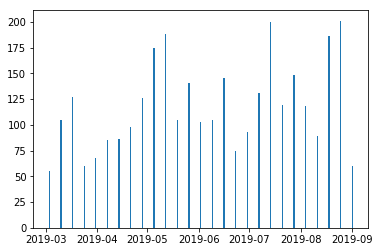

In [85]:
plt.bar(ts.index, ts.values)

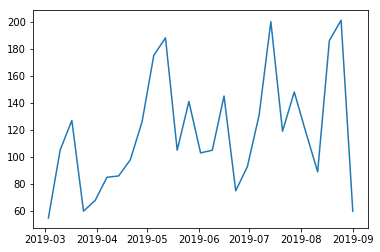

In [86]:
plt.plot(ts.index, ts.values)

In [88]:
ts2 = df.id.resample('W-WED').count()

In [89]:
ts2

created_at
2019-02-27     20
2019-03-06     79
2019-03-13    115
2019-03-20    108
2019-03-27     59
2019-04-03     63
2019-04-10     94
2019-04-17     86
2019-04-24    136
2019-05-01    129
2019-05-08    151
2019-05-15    182
2019-05-22    125
2019-05-29    106
2019-06-05    110
2019-06-12    107
2019-06-19    142
2019-06-26    102
2019-07-03     76
2019-07-10    130
2019-07-17    195
2019-07-24    147
2019-07-31    144
2019-08-07     97
2019-08-14    124
2019-08-21    179
2019-08-28    171
2019-09-04     15
Freq: W-WED, Name: id, dtype: int64

In [34]:
name_to_id

{'realDonaldTrump': '25073877',
 'vp': '818910970567344128',
 'whitehouse': '822215673812119553',
 'potus': '822215679726100480'}

In [60]:
vp_tweets = get_all_tweets(name_to_id['vp'])

getting tweets before 1159280686836174848
400 tweets downloaded so far
getting tweets before 1150818986751332352
600 tweets downloaded so far
getting tweets before 1139628208679280639
800 tweets downloaded so far
getting tweets before 1129049006200545280
1000 tweets downloaded so far
getting tweets before 1117843663999123455
1200 tweets downloaded so far
getting tweets before 1105165573279879167
1400 tweets downloaded so far
getting tweets before 1092522345875542015
1600 tweets downloaded so far
getting tweets before 1073281505093390336
1800 tweets downloaded so far
getting tweets before 1061715994090094592
2000 tweets downloaded so far
getting tweets before 1050445109156880383
2200 tweets downloaded so far
getting tweets before 1042044057227350015
2400 tweets downloaded so far
getting tweets before 1032699568419270656
2600 tweets downloaded so far
getting tweets before 1022847197434576896
2800 tweets downloaded so far
getting tweets before 1014983581943390207
3000 tweets downloaded so

In [61]:
import json
with open('vp_data.json', 'w', encoding='utf-8') as f:
    json.dump(vp_tweets, f, ensure_ascii=False)

In [62]:
whitehouse_tweets = get_all_tweets(name_to_id['whitehouse'])

getting tweets before 1166031887242018815
400 tweets downloaded so far
getting tweets before 1162540297353662463
600 tweets downloaded so far
getting tweets before 1157747532031811583
800 tweets downloaded so far
getting tweets before 1154821004155412479
1000 tweets downloaded so far
getting tweets before 1152985338505248767
1200 tweets downloaded so far
getting tweets before 1150499477486297094
1400 tweets downloaded so far
getting tweets before 1147251305804644351
1600 tweets downloaded so far
getting tweets before 1144440176493649919
1800 tweets downloaded so far
getting tweets before 1141697247538753535
2000 tweets downloaded so far
getting tweets before 1138847934504677376
2200 tweets downloaded so far
getting tweets before 1136033906376028159
2400 tweets downloaded so far
getting tweets before 1132999917302157313
2600 tweets downloaded so far
getting tweets before 1129352868107100159
2800 tweets downloaded so far
getting tweets before 1126245894872076293
3000 tweets downloaded so

In [63]:
import json
with open('whitehouse_data.json', 'w', encoding='utf-8') as f:
    json.dump(whitehouse_tweets, f, ensure_ascii=False)

In [114]:
print(len(whitehouse_tweets[8]['full_text']))
print(whitehouse_tweets[8]['full_text'])

162
President @realDonaldTrump: “I ask everyone in Hurricane Dorian’s path to heed all warnings and evacuation orders from local authorities.” https://t.co/rg7uxs18GG


In [64]:
potus_tweets = get_all_tweets(name_to_id['potus'])

getting tweets before 1159901400576532479
400 tweets downloaded so far
getting tweets before 1153291289590423557
600 tweets downloaded so far
getting tweets before 1144073837937659903
800 tweets downloaded so far
getting tweets before 1135895768383049727
1000 tweets downloaded so far
getting tweets before 1128260815386218495
1200 tweets downloaded so far
getting tweets before 1121151837846028288
1400 tweets downloaded so far
getting tweets before 1113782413597999103
1600 tweets downloaded so far
getting tweets before 1103033361579290624
1800 tweets downloaded so far
getting tweets before 1094721473833590785
2000 tweets downloaded so far
getting tweets before 1087495065453453311
2200 tweets downloaded so far
getting tweets before 1075956984418066432
2400 tweets downloaded so far
getting tweets before 1065616757505822720
2600 tweets downloaded so far
getting tweets before 1055847954295259136
2800 tweets downloaded so far
getting tweets before 1046795539675860991
3000 tweets downloaded so

In [65]:
import json
with open('potus_data.json', 'w', encoding='utf-8') as f:
    json.dump(potus_tweets, f, ensure_ascii=False)

In [71]:
potus_tweets[4]

{'created_at': 'Sun Sep 01 14:01:29 +0000 2019',
 'id': 1168161961542074369,
 'id_str': '1168161961542074369',
 'full_text': 'RT @realDonaldTrump: I have not forgotten that when it was announced that I was going to do The Apprentice, and when it then became a big h…',
 'truncated': False,
 'display_text_range': [0, 140],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'realDonaldTrump',
    'name': 'Donald J. Trump',
    'id': 25073877,
    'id_str': '25073877',
    'indices': [3, 19]}],
  'urls': []},
 'source': '<a href="https://www.whitehouse.gov/" rel="nofollow">WH Digital</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 822215679726100480,
  'id_str': '822215679726100480',
  'name': 'President Trump',
  'screen_name': 'POTUS',
  'location': 'Washington, D.C.',
  'description': '45th President of the United Sta

In [ ]:
# looks like the potus account only does retweets